#  <font color='#00BFFF'> Preparação do Corpus e Pré-Processamento </font>
* Atividade:

    * Carregar o corpus de poesias de Fernando Pessoa em um Jupyter Notebook.
    * Realizar tokenização de sentenças e palavras.
    * Remover stopwords e pontuação para facilitar a análise.
    * Criar uma nuvem de palavras (WordCloud) para visualizar termos mais frequentes.

Instalação de pacotes necessários:

In [ ]:
!pip install requests beautifulsoup4
!pip install wordcloud matplotlib
!pip install wordcloud matplotlibfrom collections import Counter
!pip install seaborn
!python -m spacy download pt_core_news_sm

ERROR: Could not find a version that satisfies the requirement matplotlibfrom (from versions: none)
ERROR: No matching distribution found for matplotlibfrom
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 34.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


Importação das bibliotecas:

In [ ]:
# Bibliotecas para processamento de texto, análise de dados e visualização
import requests  # Faz requisições HTTP para obter dados de páginas da web
from bs4 import BeautifulSoup  # Faz o parsing (extração) de dados HTML e XML
import seaborn as sns  # Biblioteca para visualização de dados com gráficos estatísticos
import pandas as pd  # Manipulação e análise de dados em DataFrames
import spacy  # Processamento de linguagem natural (PLN), incluindo tokenização e análise sintática
from collections import Counter  # Contagem eficiente de elementos iteráveis
import json

import matplotlib.pyplot as plt  # Geração de gráficos e visualizações
import numpy as np  # Operações matemáticas e manipulação de arrays

# Bibliotecas de machine learning para análise de similaridade textual
from sklearn.feature_extraction.text import TfidfVectorizer  # Transforma texto em vetores numéricos (TF-IDF)
from sklearn.metrics.pairwise import cosine_similarity  # Mede a similaridade entre textos usando cosseno

import time  # Manipulação de tempo e medições de desempenho

import nltk  # Biblioteca para processamento de linguagem natural (PLN)
from nltk.tokenize import sent_tokenize, word_tokenize  # Tokenização de sentenças e palavras
from nltk.corpus import stopwords  # Conjunto de palavras irrelevantes para análise textual
import string  # Manipulação de strings, incluindo remoção de pontuação

from wordcloud import WordCloud  # Geração de nuvens de palavras para visualização de texto

# Evita conflitos ao importar matplotlib duas vezes
import matplotlib.pyplot as plt

# Utilizadas no modelo de classificação
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

Web scraping:

In [ ]:
def extract_data(page):
    parser = BeautifulSoup(page.content, 'html.parser')

    # Extração do autor
    author = parser.find('div', class_='autor').text.strip()

    # Extração do título
    title = parser.find('h1', class_='titulo-texto').text.strip()

    # Extração do texto
    text_element = parser.find('div', class_='texto-poesia')
    if text_element:
        text = text_element.text.strip()
    else:
        text = None

    # Retorna os dados extraídos
    return {
        'author': author,
        'title': title,
        'text': text
    }

poesias = []

i = 0
erros_404_consecutivos = 0  # Contador de páginas 404 consecutivas
limite_404 = 10  # Número máximo de erros 404 consecutivos antes de parar

while True:
    url = f'http://arquivopessoa.net/textos/{i}'
    page = requests.get(url)

    # Se o status da página for 200, os dados são extraídos.
    if page.status_code == 200:
        print(f'Analisando dados da página {i}')
        data = extract_data(page)

        # Verifica se o texto foi encontrado
        if data['text']:
            print(f'Extraindo dados da página {i}')
            poesias.append(data)

        i += 1
        erros_404_consecutivos = 0  # Reset ao encontrar uma página válida

    elif erros_404_consecutivos >= limite_404:
      print("Muitas páginas 404 consecutivas. Parando a execução.")
      break  # Sai do loop se atingir o limite de páginas não encontradas

    # Se o status da página for 404, continua para a próxima página.
    elif page.status_code == 404:
        print(f'Página {i} não encontrada (404). Tentando a próxima página.')
        erros_404_consecutivos += 1
        i += 1

    # Caso o servidor retorne um erro 503, espera e tenta novamente.
    elif page.status_code == 503:
        t = 2
        print(f'Erro 503. Tentando novamente buscar a página {i} em {t} segundos.')
        time.sleep(t)

    # Se houver outro tipo de erro, também continua para a próxima página.
    else:
        print(f'Erro {page.status_code} ao buscar a página {i}. Tentando a próxima página.')
        i += 1

A saída de streaming foi truncada nas últimas 5000 linhas.
Extraindo dados da página 1343
Analisando dados da página 1344
Analisando dados da página 1345
Analisando dados da página 1346
Analisando dados da página 1347
Erro 503. Tentando novamente buscar a página 1348 em 2 segundos.
Analisando dados da página 1348
Extraindo dados da página 1348
Analisando dados da página 1349
Analisando dados da página 1350
Extraindo dados da página 1350
Analisando dados da página 1351
Analisando dados da página 1352
Analisando dados da página 1353
Analisando dados da página 1354
Extraindo dados da página 1354
Analisando dados da página 1355
Erro 503. Tentando novamente buscar a página 1356 em 2 segundos.
Analisando dados da página 1356
Extraindo dados da página 1356
Analisando dados da página 1357
Analisando dados da página 1358
Extraindo dados da página 1358
Analisando dados da página 1359
Analisando dados da página 1360
Extraindo dados da página 1360
Analisando dados da página 1361
Analisando dados d

`poesias` é uma lista que armazena dicionários contendo dados de poesias extraídas do site.

In [ ]:
# Salvar os dados extraídos em um arquivo JSON para evitar a necessidade de refazer o web scraping
with open('poesias.json', 'w', encoding='utf-8') as f:
    json.dump(poesias, f, ensure_ascii=False, indent=4)

In [ ]:
# Carregamento do arquivo JSON
with open('poesias.json', 'r', encoding='utf-8') as f:
    poesias_geral = json.load(f)

In [ ]:
poesias_geral

[{'author': 'Ricardo Reis',
  'title': 'Diana através dos ramos',
  'text': 'Diana através dos ramos\nEspreita a vinda de Endymion\nEndymion que nunca vem,\nEndymion, Endymion,\nLá longe na floresta…\nE a sua voz chamando\nExclama através dos ramos\nEndymion, Endymion…\n\nAssim choram os deuses…'},
 {'author': 'Ricardo Reis',
  'title': 'Aqui, sem outro Apolo do que Apolo,',
  'text': 'Aqui, sem outro Apolo do que Apolo,\nSem um suspiro abandonemos Cristo\n\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0E a febre de buscarmos\n\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0Um deus dos dualismos.\n\nE longe da cristã sensualidade\nQue a casta calma da beleza antiga\n\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0Nos restitua o antigo\n\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0Sentimento da vida.'},
 {'author': 'Ricardo Reis',
  'title': 'Em Ceres anoitece.',
  'text': 'Em Ceres anoitece.\nNos píncaros ainda\n\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0Faz luz.\n\nSinto-me tão grande\nNesta hora solene\n\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0E vã\n\nQue, assim 

In [ ]:
print(f"Total de poesias no site: {len(poesias_geral)}")

Total de poesias no site: 2092


In [ ]:
autores_poemas = Counter([poesia['author'] for poesia in poesias_geral])
print(f"Número de autores: {len(autores_poemas)}")
print("\nQuantidade de poemas por autor:")
for autor, quantidade in autores_poemas.items():
    print(f"{autor}: {quantidade}")

Número de autores: 18

Quantidade de poemas por autor:
Ricardo Reis: 253
Fernando Pessoa: 1306
Álvaro de Campos: 324
Joaquim Moura Costa: 8
Carlos Otto: 2
Alberto Caeiro: 120
Alexander Search: 52
Charles Robert Anon: 9
Eduardo Lança: 1
António Mora: 1
Wardour + Pessoa: 1
J. H. Hyslop: 1
Dr. Pancrácio: 4
Vicente Guedes: 1
Bernardo Soares: 6
Vadooisf: 1
David Merrick: 1
Íbis: 1


In [ ]:
# Função para filtrar as poesias por autor
def filter_poems_by_author(author_name):
    return [poema for poema in poesias_geral if poema.get('author') == author_name]

In [ ]:
poesias_fernando_pessoa = filter_poems_by_author('Fernando Pessoa')

Tokenização das poesias de Fernando Pessoa em sentenças e palavras, removendo stopwords e pontuação para obter apenas termos relevantes:

In [ ]:
nltk.download('punkt_tab')
nltk.download('stopwords')

# Tokenização de sentenças e palavras
for poesia in poesias_fernando_pessoa:
    if poesia['text']:
        sentences = sent_tokenize(poesia['text']) # Tokenização do texto em sentenças
        words = word_tokenize(poesia['text'])  # Tokenização do texto em palavras

        # Remoção de stopwords e pontuação
        stop_words = set(stopwords.words('portuguese'))
        punctuation = set(string.punctuation)

        # Filtrando as palavras, removendo stopwords e pontuação
        filtered_words = [word.lower() for word in words if word.lower() not in stop_words and word not in punctuation]

        # Armazenando os resultados no dicionário do poema
        poesia['sentences'] = sentences
        poesia['words'] = words
        poesia['filtered_words'] = filtered_words

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
poesias_geral

[{'author': 'Ricardo Reis',
  'title': 'Diana através dos ramos',
  'text': 'Diana através dos ramos\nEspreita a vinda de Endymion\nEndymion que nunca vem,\nEndymion, Endymion,\nLá longe na floresta…\nE a sua voz chamando\nExclama através dos ramos\nEndymion, Endymion…\n\nAssim choram os deuses…'},
 {'author': 'Ricardo Reis',
  'title': 'Aqui, sem outro Apolo do que Apolo,',
  'text': 'Aqui, sem outro Apolo do que Apolo,\nSem um suspiro abandonemos Cristo\n\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0E a febre de buscarmos\n\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0Um deus dos dualismos.\n\nE longe da cristã sensualidade\nQue a casta calma da beleza antiga\n\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0Nos restitua o antigo\n\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0Sentimento da vida.'},
 {'author': 'Ricardo Reis',
  'title': 'Em Ceres anoitece.',
  'text': 'Em Ceres anoitece.\nNos píncaros ainda\n\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0Faz luz.\n\nSinto-me tão grande\nNesta hora solene\n\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0E vã\n\nQue, assim 

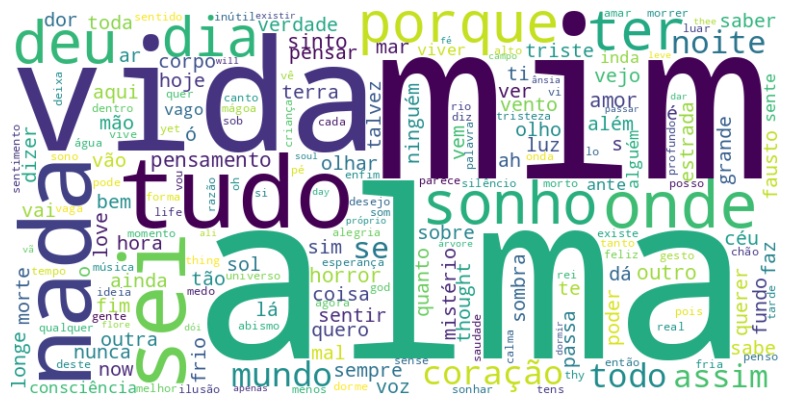

In [ ]:
# Concatenando todas as palavras filtradas de todos os poemas
all_filtered_words = []

for poesia in poesias_fernando_pessoa:
    if 'filtered_words' in poesia:
        all_filtered_words.extend(poesia['filtered_words'])

# Criar a nuvem de palavras
text = " ".join(all_filtered_words)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Exibir a nuvem de palavras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#  <font color='#00BFFF'> Análise Estatística de Vocabulário </font>
* Atividade:
    * Contar frequência de palavras e identificar os termos mais recorrentes.
    * Comparar o uso de substantivos, verbos e adjetivos na obra.
    * Criar um gráfico de distribuição de palavras.

<ipython-input-14-b6da91bb4e57>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Frequência", y="Palavra", data=df_frequencia, palette="Blues_r")


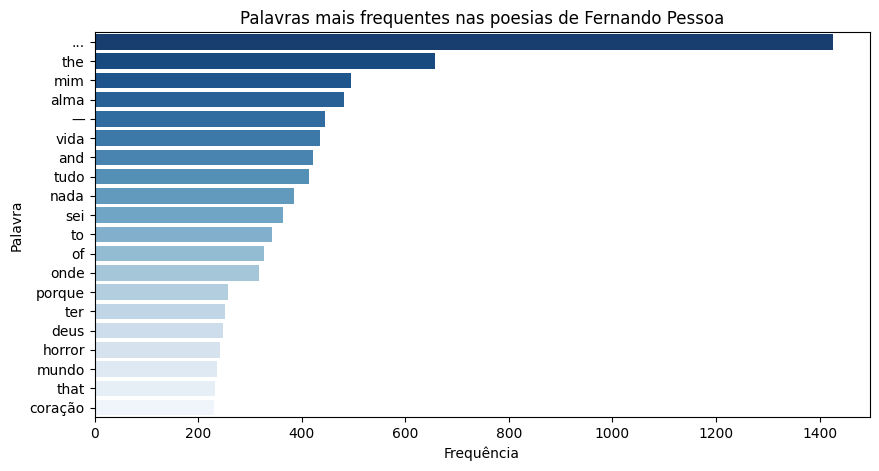

In [ ]:
# Contagem de palavras
frequencia = Counter(all_filtered_words)

# Criar DataFrame para visualização
df_frequencia = pd.DataFrame(frequencia.items(), columns=["Palavra", "Frequência"]).sort_values(by="Frequência", ascending=False).head(20)

# Plotar gráfico de barras
plt.figure(figsize=(10,5))
sns.barplot(x="Frequência", y="Palavra", data=df_frequencia, palette="Blues_r")
plt.xlabel("Frequência")
plt.ylabel("Palavra")
plt.title("Palavras mais frequentes nas poesias de Fernando Pessoa")
plt.show()

<ipython-input-15-1d6649d9a9df>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Categoria", y="Frequência", data=df_categorias, palette="pastel")


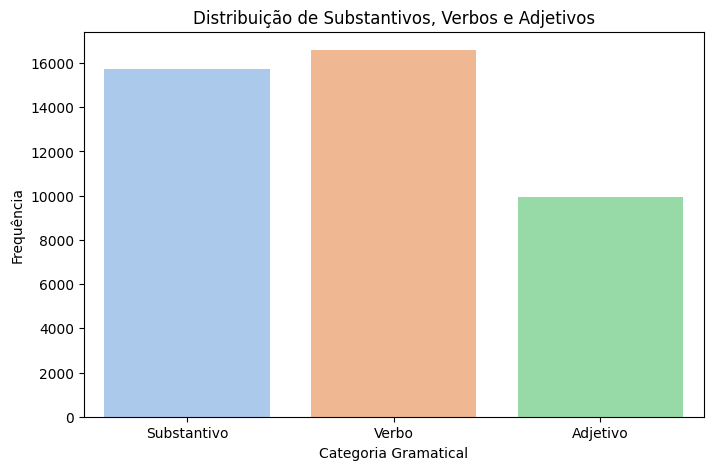

In [ ]:
# Carregar o modelo do spaCy para português
nlp = spacy.load("pt_core_news_sm")

# Criar um documento spaCy
doc = nlp(" ".join(all_filtered_words))

# Classificar palavras por tipo
categorias = {"Substantivo": 0, "Verbo": 0, "Adjetivo": 0}

for token in doc:
    if token.pos_ == "NOUN":
        categorias["Substantivo"] += 1
    elif token.pos_ == "VERB":
        categorias["Verbo"] += 1
    elif token.pos_ == "ADJ":
        categorias["Adjetivo"] += 1

df_categorias = pd.DataFrame(categorias.items(), columns=["Categoria", "Frequência"])

plt.figure(figsize=(8,5))
sns.barplot(x="Categoria", y="Frequência", data=df_categorias, palette="pastel")
plt.xlabel("Categoria Gramatical")
plt.ylabel("Frequência")
plt.title("Distribuição de Substantivos, Verbos e Adjetivos")
plt.show()

# <font color='#00BFFF'> Análise Sintática e Estilística </font>
* Atividade:
    * Aplicar POS-Tagging (Etiquetagem Gramatical).
    * Comparar a estrutura gramatical das poesias.
    * Criar um histograma da frequência de diferentes classes gramaticais.

Utilização do modelo de POS-Tagging do spaCy para classificar as palavras em classes gramaticais, com mapeamento das siglas do Universal POS Tagset para seus respectivos nomes completos.

**Universal POS Tagset:** Um conjunto mais simplificado e padronizado de etiquetas, usado para várias línguas. Ele foca em categorias mais gerais, como "NOUN", "VERB", "ADJ", etc.

<ipython-input-16-d69ad8f53821>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="POS", x="Frequência", data=df_pos, palette="Purples_r")


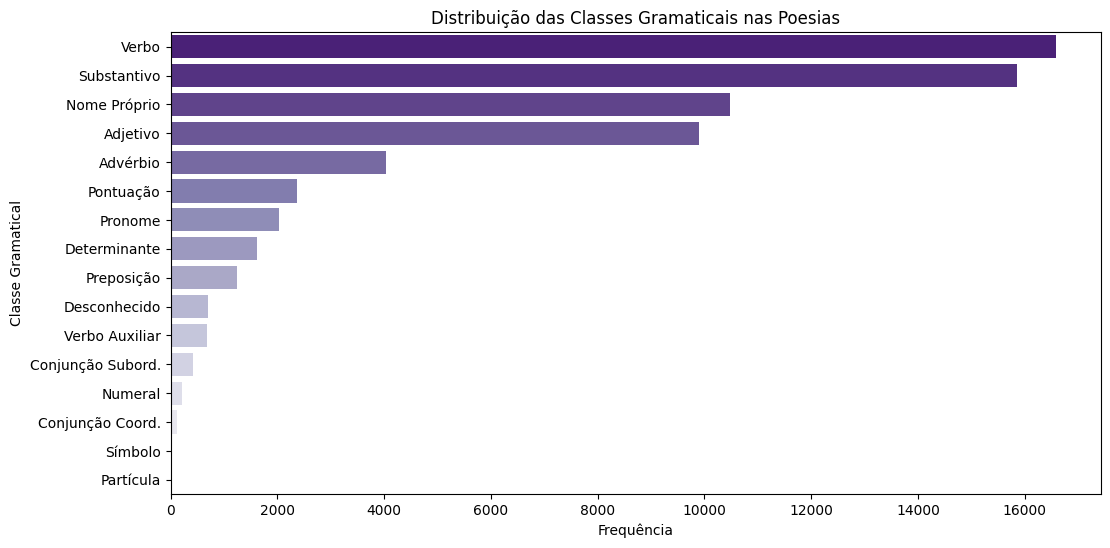

In [ ]:
# Processamento para cada poesia individualmente
pos_tags_poesias = []
for poesia in poesias_fernando_pessoa:
    if 'filtered_words' in poesia:
        text = " ".join(poesia['filtered_words'])
        doc = nlp(text)
        pos_tags = [(token.text, token.pos_) for token in doc]
        pos_tags_poesias.append(pos_tags)

pos_labels = {
    "NOUN": "Substantivo",
    "VERB": "Verbo",
    "ADJ": "Adjetivo",
    "ADV": "Advérbio",
    "PRON": "Pronome",
    "DET": "Determinante",
    "ADP": "Preposição",
    "CCONJ": "Conjunção Coord.",
    "SCONJ": "Conjunção Subord.",
    "PROPN": "Nome Próprio",
    "NUM": "Numeral",
    "AUX": "Verbo Auxiliar",
    "PART": "Partícula",
    "PUNCT": "Pontuação",
    "SYM": "Símbolo",
    "X": "Desconhecido"
}

# Criando o histograma de frequência de classes gramaticais
all_pos_tags = [tag[1] for tags in pos_tags_poesias for tag in tags]
pos_counts = Counter(all_pos_tags)

# Criar DataFrame e substituir siglas pelos nomes completos
df_pos = pd.DataFrame(pos_counts.items(), columns=["POS", "Frequência"])
df_pos["POS"] = df_pos["POS"].map(pos_labels)
df_pos = df_pos.sort_values(by="Frequência", ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(y="POS", x="Frequência", data=df_pos, palette="Purples_r")
plt.xlabel("Frequência")
plt.ylabel("Classe Gramatical")
plt.title("Distribuição das Classes Gramaticais nas Poesias")
plt.show()

In [ ]:
proporcoes_pos = []
for tags in pos_tags_poesias:
    counts = Counter([tag[1] for tag in tags])
    total = sum(counts.values())
    proporcoes = {tag: count / total for tag, count in counts.items()}
    proporcoes_pos.append(proporcoes)

# Proporções das duas primeiras poesias
if len(proporcoes_pos) >= 2:
    print("Proporções de classes gramaticais na primeira poesia:")
    print(proporcoes_pos[0])

    print("\nProporções de classes gramaticais na segunda poesia:")
    print(proporcoes_pos[1])

Proporções de classes gramaticais na primeira poesia:
{'ADJ': 0.4, 'NOUN': 0.5, 'VERB': 0.1}

Proporções de classes gramaticais na segunda poesia:
{'VERB': 0.2, 'NOUN': 0.3333333333333333, 'PROPN': 0.2, 'ADJ': 0.13333333333333333, 'ADV': 0.06666666666666667, 'PRON': 0.06666666666666667}


**Primeira poesia:**

ADJ (Adjetivo): 40% das palavras são adjetivos.

NOUN (Substantivo): 50% das palavras são substantivos.

VERB (Verbo): 10% das palavras são verbos.

Isso indica que essa poesia tem uma forte presença de substantivos e adjetivos, sugerindo que pode estar focada na descrição de coisas, sentimentos ou características.

</br>

**Segunda poesia:**

VERB (Verbo): 20% das palavras são verbos.

NOUN (Substantivo): 33,33% são substantivos.

PROPN (Nome próprio): 20% são nomes próprios.

ADJ (Adjetivo): 13,33% são adjetivos.

ADV (Advérbio) e PRON (Pronome): 6,67% cada.

Essa poesia apresenta uma distribuição mais variada de classes gramaticais. O fato de ter uma proporção maior de verbos pode indicar uma poesia mais dinâmica, focada em ações. A presença de nomes próprios sugere que pode haver personagens ou referências a entidades específicas.

# <font color='#00BFFF'> Modelagem de Estilo e Semântica </font>
* Atividade:
    * Calcular a riqueza lexical das poesias.
    * Aplicar TF-IDF para destacar palavras mais importantes.
    * Criar embeddings de palavras para comparação semântica.

O código calcula a **riqueza lexical** de várias poesias, medindo a diversidade de palavras, dividindo o número de palavras únicas pelo total de palavras em cada poesia. Se a poesia tiver muitas palavras diferentes (não repetidas), a riqueza lexical será maior. Caso contrário, se o texto tiver muitas repetições de palavras, a riqueza lexical será menor.

In [ ]:
# Carregar modelo do spaCy
nlp = spacy.load("pt_core_news_sm")

# Função para calcular a riqueza lexical
def lexical_richness(text):
    words = text.split()
    return len(set(words)) / len(words) if words else 0

# Calcular riquezas lexicais
riquezas_lexicais = [
    lexical_richness(" ".join(poesia['filtered_words']))
    for poesia in poesias_fernando_pessoa if 'filtered_words' in poesia
]

for i, riqueza in enumerate(riquezas_lexicais):
    print(f"Poesia {i+1}: Riqueza lexical = {riqueza:.4f}")

Poesia 1: Riqueza lexical = 0.8000
Poesia 2: Riqueza lexical = 0.7333
Poesia 3: Riqueza lexical = 0.6000
Poesia 4: Riqueza lexical = 0.8636
Poesia 5: Riqueza lexical = 0.6800
Poesia 6: Riqueza lexical = 0.7692
Poesia 7: Riqueza lexical = 0.6842
Poesia 8: Riqueza lexical = 0.8571
Poesia 9: Riqueza lexical = 0.9697
Poesia 10: Riqueza lexical = 0.8571
Poesia 11: Riqueza lexical = 0.7143
Poesia 12: Riqueza lexical = 0.8846
Poesia 13: Riqueza lexical = 0.8537
Poesia 14: Riqueza lexical = 0.7857
Poesia 15: Riqueza lexical = 0.8929
Poesia 16: Riqueza lexical = 0.7368
Poesia 17: Riqueza lexical = 0.5385
Poesia 18: Riqueza lexical = 0.7436
Poesia 19: Riqueza lexical = 0.8750
Poesia 20: Riqueza lexical = 0.7692
Poesia 21: Riqueza lexical = 0.4853
Poesia 22: Riqueza lexical = 1.0000
Poesia 23: Riqueza lexical = 0.6111
Poesia 24: Riqueza lexical = 0.8400
Poesia 25: Riqueza lexical = 0.7586
Poesia 26: Riqueza lexical = 0.9048
Poesia 27: Riqueza lexical = 0.9512
Poesia 28: Riqueza lexical = 0.8462
P

Aplicação do TF-IDF às poesias de Fernando Pessoa para identificar e exibir as 10 palavras mais relevantes em cada uma delas.

In [ ]:
# Aplicar TF-IDF
corpus = [" ".join(poesia['filtered_words']) for poesia in poesias_fernando_pessoa if 'filtered_words' in poesia]
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(corpus)
feature_names = vectorizer.get_feature_names_out()

# Obter as palavras mais importantes de cada poesia
palavras_importantes = [
    [(feature_names[idx], tfidf_matrix[i, idx]) for idx in np.argsort(tfidf_matrix[i].toarray()[0])[::-1][:10]]
    for i in range(len(corpus))
]

for i, palavras in enumerate(palavras_importantes):
    print(f"\nPoesia {i+1}: Palavras mais importantes:")
    for palavra, score in palavras:
        print(f"- {palavra}: {score:.4f}")


Poesia 1: Palavras mais importantes:
- burburinho: 0.6600
- água: 0.3854
- espalha: 0.3300
- baralha: 0.3300
- regato: 0.3121
- mágoa: 0.1990
- ilusão: 0.1863
- verdade: 0.1626
- entronizo: 0.0000
- envelheceu: 0.0000

Poesia 2: Palavras mais importantes:
- vais: 0.4988
- leve: 0.4215
- chão: 0.4006
- andares: 0.3413
- sonho: 0.2944
- teres: 0.2912
- és: 0.1993
- sente: 0.1847
- coração: 0.1366
- ter: 0.1336

Poesia 3: Palavras mais importantes:
- nuvem: 0.5955
- vai: 0.4559
- alta: 0.4042
- passa: 0.3071
- escravo: 0.2514
- graça: 0.2181
- alto: 0.1671
- vento: 0.1536
- pensamento: 0.1325
- entristeço: 0.0000

Poesia 4: Palavras mais importantes:
- nuvem: 0.3636
- passa: 0.2813
- sol: 0.2764
- enrolou: 0.2699
- latente: 0.2699
- girassolou: 0.2699
- maligna: 0.2449
- girassol: 0.2449
- pendão: 0.2368
- vira: 0.2303

Poesia 5: Palavras mais importantes:
- sei: 0.4306
- lá: 0.3189
- tudo: 0.2573
- luz: 0.2161
- bem: 0.1900
- pode: 0.1658
- sim: 0.1629
- vegetações: 0.1462
- anoitecida:

In [ ]:
# Criar embeddings de palavras
embeddings = {}

for poesia in poesias_fernando_pessoa:
    if 'filtered_words' in poesia:
        for word in poesia['filtered_words']:
            if word not in embeddings and nlp(word)[0].has_vector:
                embeddings[word] = nlp(word).vector

# Comparar similaridade semântica entre duas palavras
def calcular_similaridade(word1, word2):
    if word1 in embeddings and word2 in embeddings:
        vec1, vec2 = embeddings[word1], embeddings[word2]
        return np.dot(vec1, vec2) / (np.linalg.norm(vec1) * np.linalg.norm(vec2))
    return None

In [ ]:
# Palavras para comparar
word1 = "brilho"
word2 = "luz"

# Calcular similaridade e exibir o resultado
similaridade = calcular_similaridade(word1, word2)

if similaridade is not None:
    print(f"Similaridade entre '{word1}' e '{word2}': {similaridade:.4f}")
else:
    print(f"Uma das palavras ('{word1}' ou '{word2}') não possui um embedding disponível.")

Similaridade entre 'brilho' e 'luz': 0.3887


# <font color='#00BFFF'> Comparação com Outros Poetas </font>
* Atividade:
    * Comparar a escrita de Fernando Pessoa com a de outros poetas portugueses.
    * Gerar um modelo de similaridade textual para encontrar diferenças estilísticas.
    * Criar um classificador para tentar identificar quem escreveu um poema com base nas características do texto.

In [ ]:
for poesia in poesias_geral:
    if poesia['text']:
        sentences = sent_tokenize(poesia['text'], language='portuguese')
        words = word_tokenize(poesia['text'], language='portuguese')

        stop_words = set(stopwords.words('portuguese'))
        punctuation = set(string.punctuation)

        filtered_words = [word.lower() for word in words if word.lower() not in stop_words and word not in punctuation]

        poesia['sentences'] = sentences
        poesia['words'] = words
        poesia['filtered_words'] = filtered_words

In [ ]:
corpus_todos = []
autores_todos = []

for poesia in poesias_geral:
    if 'filtered_words' in poesia:
        corpus_todos.append(" ".join(poesia['filtered_words']))
        autores_todos.append(poesia['author'])

# Vetorização TF-IDF
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(corpus_todos)

# DataFrame para visualização
df_tfidf = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())
df_tfidf['Autor'] = autores_todos

# Analisar as palavras mais importantes por autor
for autor in df_tfidf['Autor'].unique():
  print(f"\nPalavras mais importantes para {autor}:")
  autor_df = df_tfidf[df_tfidf['Autor'] == autor]
  palavras_importantes = autor_df.drop('Autor', axis=1).mean().sort_values(ascending=False).head(10)
  print(palavras_importantes)


Palavras mais importantes para Ricardo Reis:
deuses     0.050287
vida       0.040748
nada       0.026646
lídia      0.019986
hora       0.018858
porque     0.018744
destino    0.017564
pouco      0.015878
amor       0.015735
sol        0.015224
dtype: float64

Palavras mais importantes para Fernando Pessoa:
mim        0.021730
me         0.021596
alma       0.021326
sei        0.020287
nada       0.018913
tudo       0.018863
vida       0.017711
the        0.017406
onde       0.015419
coração    0.015214
dtype: float64

Palavras mais importantes para Álvaro de Campos:
tudo      0.040241
vida      0.031542
me        0.029592
todos     0.027285
mim       0.023742
todas     0.022361
nada      0.021905
ter       0.021679
coisas    0.020957
coisa     0.020376
dtype: float64

Palavras mais importantes para Joaquim Moura Costa:
padre      0.088976
atólica    0.080473
greja      0.080473
tal        0.057719
amélia     0.052039
rimava     0.052039
arrelia    0.052039
arrélia    0.052039
um     

In [ ]:
riqueza_por_autor = {}

for poesia in poesias_geral:
    if 'filtered_words' in poesia:
        autor = poesia['author']
        riqueza = lexical_richness(" ".join(poesia['filtered_words']))
        if autor not in riqueza_por_autor:
            riqueza_por_autor[autor] = []
        riqueza_por_autor[autor].append(riqueza)

for autor, riquezas in riqueza_por_autor.items():
    riqueza_media = np.mean(riquezas)
    print(f"Riqueza lexical média de {autor}: {riqueza_media:.4f}")

Riqueza lexical média de Ricardo Reis: 0.9012
Riqueza lexical média de Fernando Pessoa: 0.8155
Riqueza lexical média de Álvaro de Campos: 0.7963
Riqueza lexical média de Joaquim Moura Costa: 0.8925
Riqueza lexical média de Carlos Otto: 0.9773
Riqueza lexical média de Alberto Caeiro: 0.7787
Riqueza lexical média de Alexander Search: 0.6649
Riqueza lexical média de Charles Robert Anon: 0.7642
Riqueza lexical média de Eduardo Lança: 0.9265
Riqueza lexical média de António Mora: 0.9057
Riqueza lexical média de Wardour + Pessoa: 0.8108
Riqueza lexical média de J. H. Hyslop: 0.8125
Riqueza lexical média de Dr. Pancrácio: 0.8690
Riqueza lexical média de Vicente Guedes: 0.9348
Riqueza lexical média de Bernardo Soares: 0.8517
Riqueza lexical média de Vadooisf: 0.9474
Riqueza lexical média de David Merrick: 0.6477
Riqueza lexical média de Íbis: 0.8857


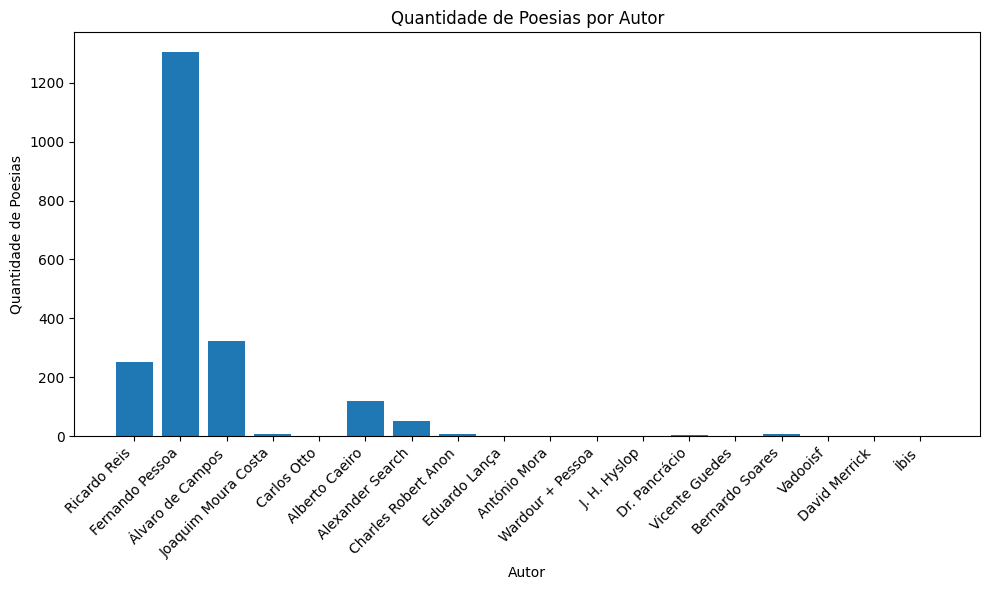

In [ ]:
autores = list(riqueza_por_autor.keys())
quantidades = [len(riqueza_por_autor[autor]) for autor in autores]

plt.figure(figsize=(10, 6))
plt.bar(autores, quantidades)
plt.xlabel("Autor")
plt.ylabel("Quantidade de Poesias")
plt.title("Quantidade de Poesias por Autor")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [ ]:
# Calcular similaridade do cosseno entre todas as poesias
similaridade = cosine_similarity(tfidf_matrix)

# Criar DataFrame para visualizar os resultados
df_similaridade = pd.DataFrame(similaridade, index=autores_todos, columns=autores_todos)

print(df_similaridade)

                 Ricardo Reis  Ricardo Reis  Ricardo Reis  Ricardo Reis  \
Ricardo Reis         1.000000      0.009556      0.019513      0.022166   
Ricardo Reis         0.009556      1.000000      0.015452      0.023641   
Ricardo Reis         0.019513      0.015452      1.000000      0.051001   
Ricardo Reis         0.022166      0.023641      0.051001      1.000000   
Fernando Pessoa      0.000000      0.000000      0.000000      0.000000   
...                       ...           ...           ...           ...   
Fernando Pessoa      0.012035      0.012430      0.045644      0.006781   
Fernando Pessoa      0.018838      0.015019      0.084529      0.015816   
Fernando Pessoa      0.000000      0.000000      0.057908      0.015400   
Fernando Pessoa      0.000000      0.024444      0.029520      0.017128   
Fernando Pessoa      0.006137      0.000000      0.041384      0.018913   

                 Fernando Pessoa  Ricardo Reis  Fernando Pessoa  \
Ricardo Reis            0.000000

In [ ]:
# Consolidar todas as poesias de cada autor em um único texto
autores_textos = {}

for poesia in poesias_geral:
    if 'filtered_words' in poesia:
        autor = poesia['author']
        if autor not in autores_textos:
            autores_textos[autor] = []
        autores_textos[autor].extend(poesia['filtered_words'])

# Transformar listas de palavras em strings
for autor in autores_textos:
    autores_textos[autor] = " ".join(autores_textos[autor])

# Criar a matriz TF-IDF
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(autores_textos.values())

# Calcular similaridade do cosseno
similaridade = cosine_similarity(tfidf_matrix)

df_similaridade = pd.DataFrame(similaridade, index=autores_textos.keys(), columns=autores_textos.keys())

print(df_similaridade)

                     Ricardo Reis  Fernando Pessoa  Álvaro de Campos  \
Ricardo Reis             1.000000         0.532108          0.564401   
Fernando Pessoa          0.532108         1.000000          0.714132   
Álvaro de Campos         0.564401         0.714132          1.000000   
Joaquim Moura Costa      0.131981         0.163348          0.162607   
Carlos Otto              0.069362         0.088389          0.072068   
Alberto Caeiro           0.518112         0.575648          0.668541   
Alexander Search         0.004944         0.522001          0.111814   
Charles Robert Anon      0.002698         0.457086          0.093098   
Eduardo Lança            0.101144         0.108984          0.116080   
António Mora             0.081880         0.090386          0.136683   
Wardour + Pessoa         0.060653         0.087230          0.082084   
J. H. Hyslop             0.071296         0.084842          0.059765   
Dr. Pancrácio            0.179825         0.217306          0.20

A tabela mostra que os heterônimos de Fernando Pessoa têm estilos bem diferentes. Mesmo sendo criações dele, as poesias de cada um não são muito parecidas. Isso prova que ele conseguiu dar identidade própria a cada heterônimo.

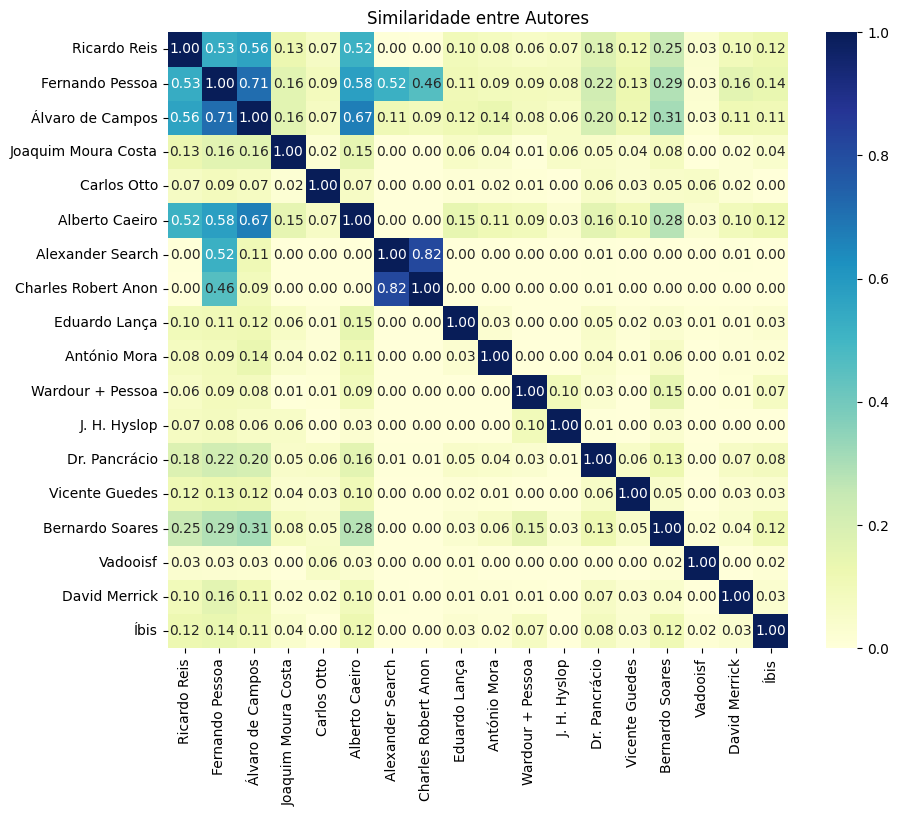

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_similaridade, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Similaridade entre Autores")
plt.show()

### Regressão Logística:

In [ ]:
# Preparação dos dados
df = pd.DataFrame(poesias_geral)
df['filtered_text'] = df['filtered_words'].apply(lambda x: ' '.join(x))

# Transformar rótulos em valores numéricos
le = LabelEncoder()
df['author_encoded'] = le.fit_transform(df['author'])

# Separar dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(df['filtered_text'], df['author_encoded'], test_size=0.2, random_state=42)

# Criar pipeline com vetorização e regressão logística
pipeline = make_pipeline(CountVectorizer(), LogisticRegression())

# Treinar o modelo
pipeline.fit(X_train, y_train)

# Fazer previsões
y_pred = pipeline.predict(X_test)

# Avaliação do modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia do modelo: {accuracy:.2f}')

Acurácia do modelo: 0.75


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.36      0.53        25
           1       0.60      0.43      0.50         7
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         3
           6       0.00      0.00      0.00         1
           9       0.76      0.94      0.84       269
          11       0.00      0.00      0.00         4
          12       0.76      0.53      0.62        53
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         1
          16       0.66      0.45      0.53        51

    accuracy                           0.75       419
   macro avg       0.31      0.23      0.25       419
weighted avg       0.73      0.75      0.72       419



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Conclusões e Melhorias

O modelo funciona bem para algumas classes, mas falha completamente em outras.

O recall muito baixo em algumas classes sugere que há um desequilíbrio nos dados, e o modelo pode estar favorecendo classes majoritárias.

Possíveis melhorias incluem:
- Balanceamento dos dados (aumentar as amostras das classes minoritárias).
- Ajuste de hiperparâmetros do modelo.
- Teste de outro algoritmo que lide melhor com classes desbalanceadas.

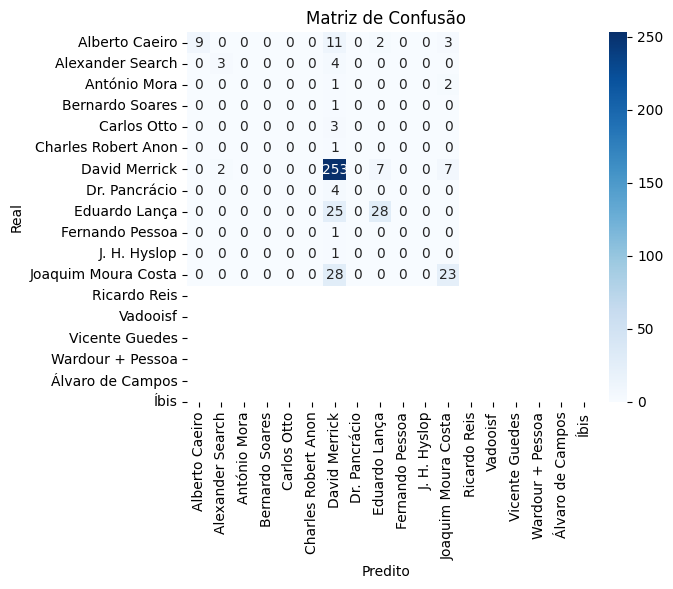

In [ ]:
# Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()